<a href="https://colab.research.google.com/github/LLewis/ai-deep-learning/blob/main/LLewis_ANN_breadthVsdepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Parametric experiement : manipulate the number of hidden layers
#and number of units in each hidden layer

#import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


<ipython-input-44-3a28591662f5>:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [45]:
#import dataset(comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

#convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

#transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
#label[iris.species=='setosa'] = 0 #don't need
labels[iris.species=='versicolor']= 1
labels[iris.species== 'virginica'] = 2

In [46]:
#create a class for the model

class ANNiris(nn.Module):

  #initializes the model
  #only defining object , there's no complex action
  def __init__(self, nUnits, nLayers):  #self refers to the instance I'm using. number units & number of layers in the model
                                        #allows me to create different models using parameterized unit and layer values
    super().__init__()

    #create dictionary to store the layers -
    #pair of empty braces {} creates a dictionary, key:value pairs. mydictionary{'fname':LaTonya, 'lname':Jones}
    self.layers = nn.ModuleDict()  #numpy uses a specific dict to store layers in a nueral deep learning network,
    #Caused Key not found error when testing - modified to assigning nLayers instead of nUnits
    #self.nLayers = nUnits #nLayers#
    self.nLayers = nLayers

    ### input layer
    self.layers['input'] = nn.Linear(4, nUnits)  # the number 4 specifies the input features of the data, such as lenght, width etc
                                                 #nUnits specifies the number of units I output to


    ### hidden layers
    for i in range(nLayers):
      self.layers[f'hidden{i}'] = nn.Linear(nUnits, nUnits) #iterating and adding layer and all nUnits to each hidden layer hidden:0, hidden1, hidden2 etc
                                                            #each layer will have the same number of nUnits

      ### output layer
      self.layers['output']= nn.Linear(nUnits, 3) #takes in nUnits and 3 categories - features of the iris flower


    #forward pass - propagation - complex action here
    #defines what the model does when I call model as a function
  def forward(self, x):
      #input layer
      x = self.layers['input'](x)

      #hidden layers
      #linear, multipliction and sum linear part of computation
      #passing x through each layer
      for i in range(self.nLayers):
        x = F.relu(self.layers[f'hidden{i}'](x)) #relu the activation function

      #return output layer
      x = self.layers['output'](x)
      return x





In [47]:
#So now I'll creae an instance of the ANNiris class to test
#generate an instance of the model and inpspect it first
#numnber of features in and out are 12 after executing  code
nUnitsPerLayer = 12
nLayers = 4
net = ANNiris(nUnitsPerLayer,nLayers)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
  )
)

In [48]:
#Creae a test running some numbers through the  model
#This ensures the architecture is internally consistent

#10 samples, 4 dimensions
tmpx = torch.randn(10,4)  #inputting 10 flowers and 4 features of flowers

#run it through the DL deep learning model
y = net(tmpx)

#examine the shape of the output
print(y.shape), print(' ')

print(y)

torch.Size([10, 3])
 
tensor([[ 0.0380,  0.0284, -0.0374],
        [ 0.0644,  0.0561, -0.0403],
        [ 0.0653,  0.0540, -0.0353],
        [ 0.0552,  0.0405, -0.0313],
        [ 0.0519,  0.0404, -0.0354],
        [ 0.0430,  0.0467, -0.0527],
        [ 0.0356,  0.0286, -0.0370],
        [ 0.0510,  0.0462, -0.0354],
        [ 0.0531,  0.0388, -0.0324],
        [ 0.0612,  0.0478, -0.0308]], grad_fn=<AddmmBackward0>)


Error due to incorrect assignment in __init__ method
---------------------------------------------------------------------------

KeyError                                  Traceback (most recent call last)

<ipython-input-32-cce5735d4f3c> in <cell line: 8>()
      6
      7 #run it through the DL deep learning model
----> 8 y = net(tmpx)
      9
     10 #examine the shape of the output

3 frames

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py in __getitem__(self, key)
    457     @_copy_to_script_wrapper
    458     def __getitem__(self, key: str) -> Module:
--> 459         return self._modules[key]
    460
    461     def __setitem__(self, key: str, module: Module) -> None:

KeyError: 'hidden4'

In [62]:
# a function to train the  model

def trainTheModel(theModel):

  #define the loss function and optimizer
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(theModel.parameters(), lr=.01)  #lr is the learning rate

  #loop over epochs
  for epochi in range(numepochs):

    #forward pass
    yHat = theModel(data)

    #compute loss
    loss = lossfun(yHat, labels)

    #back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #final forward pass to get accuracy
    predictions = theModel(data)
    predlabels = torch.argmax(predictions, axis=1)
    acc = 100*torch.mean((predlabels == labels).float())

    #total number of trainable parameters in the model
    nParams = sum(p.numel() for p in theModel.parameters() if p.requires_grad)

    #function outputs
    return acc,nParams


In [76]:
#test the function once
numepochs = 2500
acc = trainTheModel(net)

#check the outputs
acc #here is the tuple containing (accuracy, nparams)

(tensor(33.3333), 51303)

In [65]:
#Now for the Experiment

#define the model parameters
#defining two vectors
numlayers = range(1,6) #number of hiddent layers 5? vector contains 1 through 5 layers
numunits = np.arange(4,101,3) #number of units per hidden layer  4 through 100 in steps of 3

#initialize output matrices
accuracies = np.zeros((len(numunits), len(numlayers)))
totalparams = np.zeros((len(numunits), len(numlayers)))

#number of training epochs
numepochs = 500

#start experiment
for unitidx in range(len(numunits)):
  for layeridx in range(len(numlayers)):

    #create a fresh model instance
    net = ANNiris(numunits[unitidx],numlayers[layeridx])

    #run the model and store the results
    acc,nParams = trainTheModel(net)
    accuracies[unitidx,layeridx]= acc

    #sotre the total number of parameters in the model
    totalparams[unitidx,layeridx] = nParams

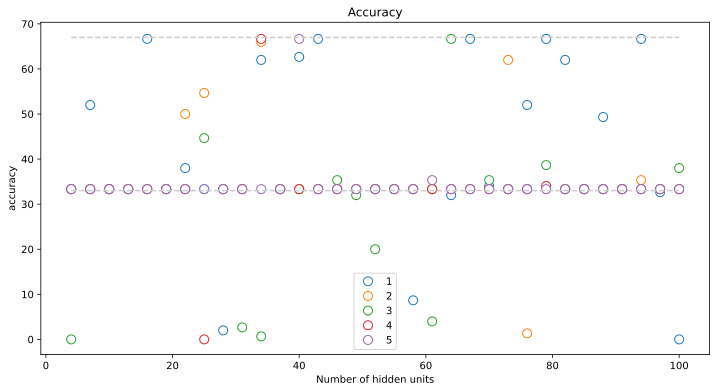

In [74]:
#show accruacy as a function of model depth
fig,ax = plt.subplots(1, figsize=(12,6))

ax.plot(numunits,accuracies, 'o',markerfacecolor='w',markersize=9)
ax.plot(numunits[[0,-1]], [33,33], '--',color=[.8,.8,.8])
ax.plot(numunits[[0,-1]], [67,67], '--',color=[.8,.8,.8])
ax.legend(numlayers)
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()

In [72]:
totalparams.shape
totalparams  #displays total units (33 in this case per layer)

array([[   55.,    75.,    95.,   115.,   135.],
       [  115.,   171.,   227.,   283.,   339.],
       [  193.,   303.,   413.,   523.,   633.],
       [  289.,   471.,   653.,   835.,  1017.],
       [  403.,   675.,   947.,  1219.,  1491.],
       [  535.,   915.,  1295.,  1675.,  2055.],
       [  685.,  1191.,  1697.,  2203.,  2709.],
       [  853.,  1503.,  2153.,  2803.,  3453.],
       [ 1039.,  1851.,  2663.,  3475.,  4287.],
       [ 1243.,  2235.,  3227.,  4219.,  5211.],
       [ 1465.,  2655.,  3845.,  5035.,  6225.],
       [ 1705.,  3111.,  4517.,  5923.,  7329.],
       [ 1963.,  3603.,  5243.,  6883.,  8523.],
       [ 2239.,  4131.,  6023.,  7915.,  9807.],
       [ 2533.,  4695.,  6857.,  9019., 11181.],
       [ 2845.,  5295.,  7745., 10195., 12645.],
       [ 3175.,  5931.,  8687., 11443., 14199.],
       [ 3523.,  6603.,  9683., 12763., 15843.],
       [ 3889.,  7311., 10733., 14155., 17577.],
       [ 4273.,  8055., 11837., 15619., 19401.],
       [ 4675.,  883

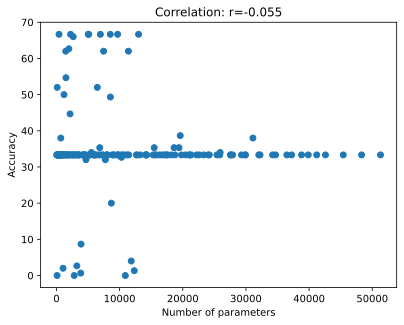

In [73]:
#Possibly its simply a matter of more parameters for better performance

#vectorize for convience
x = totalparams.flatten()
y = accuracies.flatten()

#correlation between number of parameters (units) in each layer
r = np.corrcoef(x,y)[0,1]

#scatter plot
plt.plot(x,y,'o')
plt.xlabel('Number of parameters')
plt.ylabel('Accuracy')
plt.title('Correlation: r=' + str(np.round(r,3)))
plt.show()

#shows no relationship with the number of training parameters
#correlation shows close to zero

output -  displays 5 hidden layers and 33 units per layer
(33, 5)